In [1]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob
import DIC.DIC as dic

path = r'G:\AL IMAGE\1mm_CTS_UVoff_mobile'
save_path =r'G:\AL IMAGE\1mm_CTS_UVoff_mobile'
image = dic.load_file(path)
print(image.keys())

crack_tip = [[563,78]] # y, x

left, right, up_down = 50,250,150

dict_keys(['crop00133', 'crop00347', 'crop00397', 'crop00454'])


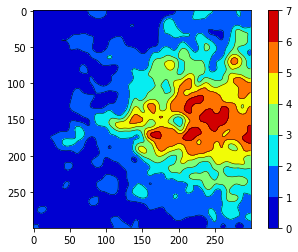

In [17]:
i = 0 ##ref
j = 0 ##cur


src_reference = image['crop00133'][:, :, 1][crack_tip[i][0]-up_down:crack_tip[i][0]+up_down,crack_tip[i][1]-left:crack_tip[i][1]+right]
src_current = image['crop00454'][:, :, 1][crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]


dst = cv2.subtract(src_current,src_reference)

hist = cv2.calcHist([dst],[0],None,[256],[0,256])
dst = dst.astype(float)

dst = np.where(dst>10, dst*0, dst)
gas = cv2.GaussianBlur(dst,(0,0),5)





plt.imshow(src_current, cmap='gray')
# cs = plt.contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
# plt.axis('off')

cs = plt.contour(gas, colors='black', linewidths = 0.5)
csf = plt.contourf(gas, cmap = 'jet')
cb = plt.colorbar(csf)


plt.savefig(save_path+'/ff2054contourf.png', dpi=500)


